## Load the data

In [1]:
"""# install
%pip install matplotlib numpy scipy sklearn pyyaml tqdm torch torchvision numba pandas h5py plotly pysanky
%pip install --pre cebra[datasets,demos]

# you should also install cuda for 10x faster computation 
%pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

# for mat to py conversion
#%pip install mat4py ???? #TODO: test and improve matlab files to python conversion

"""

'# install\n%pip install matplotlib numpy scipy sklearn pyyaml tqdm torch torchvision numba pandas h5py plotly pysanky\n%pip install --pre cebra[datasets,demos]\n\n# you should also install cuda for 10x faster computation \n%pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html\n\n# for mat to py conversion\n#%pip install mat4py ???? #TODO: test and improve matlab files to python conversion\n\n'

In [2]:
# install dependencies
#!pip install --pre --user cebra[datasets,demos]

# import 
import os
import numpy as np
import sys
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent.parent))
from Classes import Animal, Vizualizer, load_all_animals, global_logger_object
from Classes import yield_animal_session_task, yield_animal_session, yield_animal, filter_dict_by_properties
from Classes import correlate_vectors
from Visualizer import *
import matplotlib.pyplot as plt
from cebra import CEBRA
import cebra
import torch
print(f"Cuda activated: {torch.cuda.is_available()}")

plt.style.use('dark_background')
%matplotlib inline
#%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

if not os.path.exists("logs"):
    os.mkdir("logs")
global_logger_object.set_save_dir(os.path.join(os.getcwd(), "logs"))


Cuda activated: True


Autosaving every 180 seconds


In [3]:
fpath = r"d:\Experiments\Andres\DON-111111\20230906\results.npz"
data = np.load(fpath, allow_pickle=True)
sampleRate_2p = data["sampleRate_2P"]
sampleRate_NI = data["sampleRate_NI"]

In [4]:
from Setups import Wheel_Setup

fpath = r"d:\Experiments\Andres\DON-111111\20230906\results.npz"

behavior_metadata = {
    "radius": 0.1, # wheel radius
    "fps": 10000, #sampleRate_NI, # rotary encoder sampling rate
    "clicks_per_rotation": 500, # rotary encoder clicks per rotation
    "preprocessing": "rotary_encoder",
    "imaging_fps": sampleRate_2p, # imaging frame rate
    # Optional for Andres
    "task_id": "DON-111111_20230906_Test", # task id
    "method": "2P", # imaging method
}
wheel = Wheel_Setup(key="test", metadata=behavior_metadata)
wheel.raw_data_path = fpath


In [5]:
wheel.__dict__

{'key': 'test',
 'root_dir_name': 'TRD-2P',
 'root_dir': WindowsPath('TRD-2P'),
 'method': '2P',
 'preprocess_name': 'rotary_encoder',
 'process_name': 'environment',
 'static_outputs': {WindowsPath('TRD-2P'): ['results.npy']},
 'variable_outputs': {WindowsPath('TRD-2P'): []},
 'own_outputs': [],
 'data_naming_scheme': 'results.npy',
 'identifier': {'animal_id': 'DON-111111',
  'date': '20230906',
  'task_name': 'Test'},
 'raw_data_path': 'd:\\Experiments\\Andres\\DON-111111\\20230906\\results.npz',
 'metadata': {'radius': 0.1,
  'fps': 10000,
  'clicks_per_rotation': 500,
  'preprocessing': 'rotary_encoder',
  'imaging_fps': array(30),
  'task_id': 'DON-111111_20230906_Test',
  'method': '2P',
  'processing': 'environment',
  'environment_dimensions': [0.6283185307179586],
  'stimulus_dimensions': None,
  'stimulus_sequence': None,
  'stimulus_type': None},
 'data_dir': WindowsPath('TRD-2P'),
 'wheel': <Setups.Wheel at 0x1bf8395e790>,
 'preprocess': <Setups.RotaryEncoder at 0x1bf8395e

In [11]:
data = wheel.process_data(smooth=True, save=False)
for key, value in data.items():
    print(key, value.shape)

No segment dimensionss or sequence provided. Not extracting stimulus.
distance (89948,)
position (1, 89948)
velocity (1, 89947)
acceleration (1, 89946)


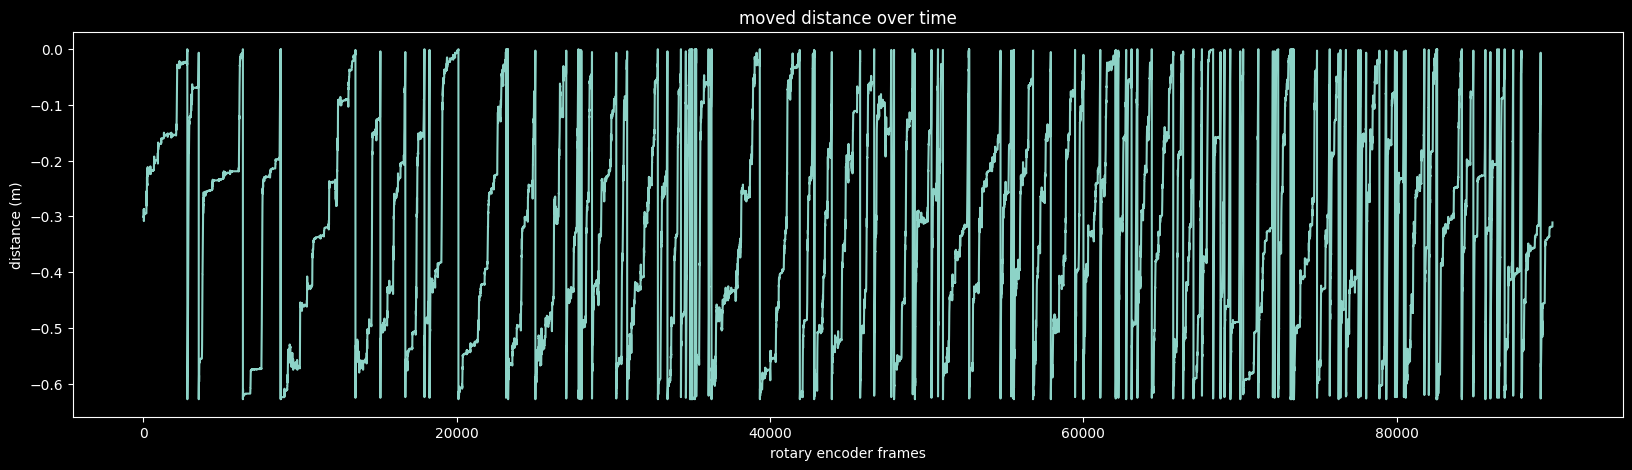

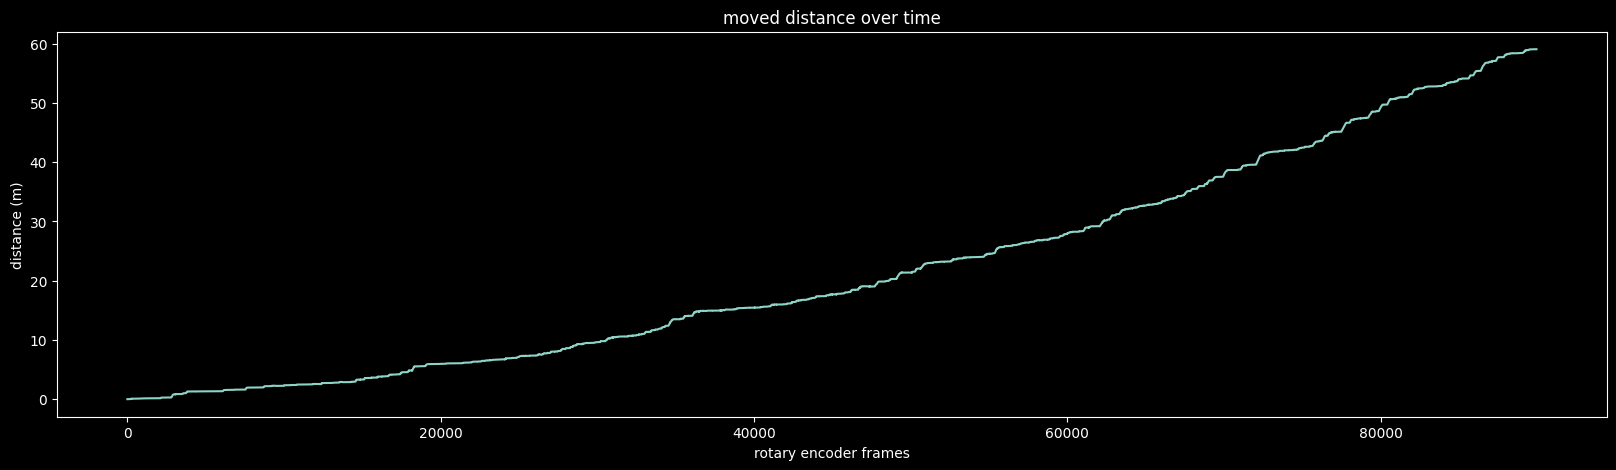

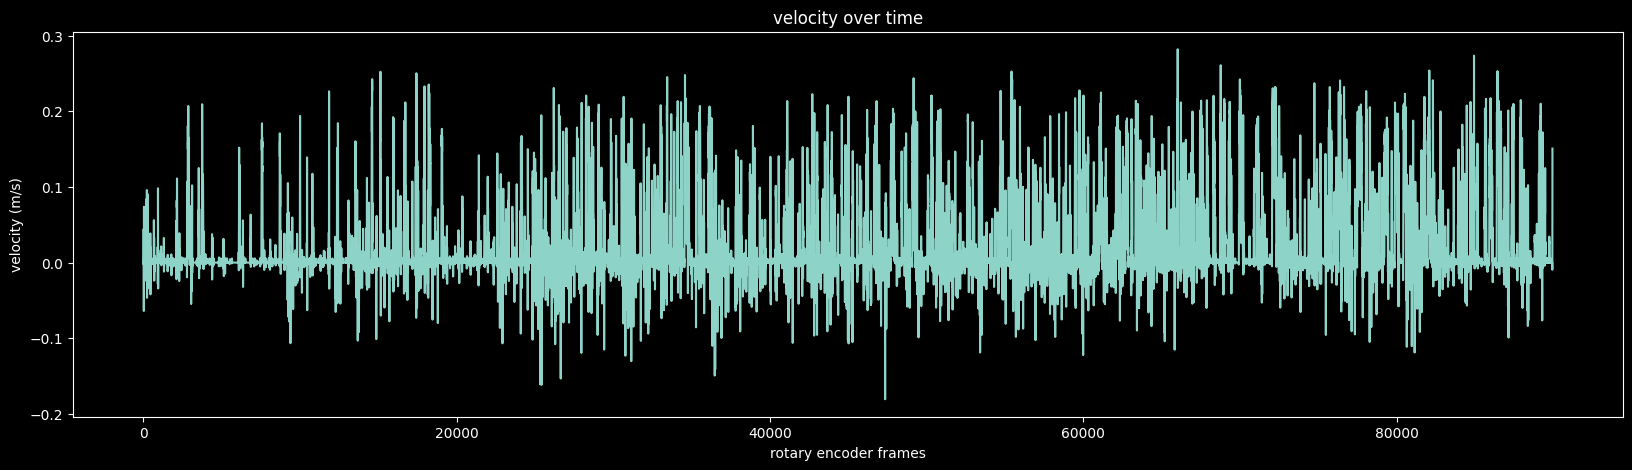

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
plt.title("moved distance over time")
plt.plot(-data["position"][0])
plt.xlabel("2P frames")
plt.ylabel("distance (m)")
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.title("moved distance over time")
plt.plot(-data["distance"])
plt.xlabel("2P frames")
plt.ylabel("distance (m)")
plt.show()

plt.figure(figsize=(20, 5))
plt.title("velocity over time")
plt.plot(-data["velocity"][0])
plt.xlabel("2P frames")
plt.ylabel("velocity (m/s)")
plt.show()
